In [1]:
def is_laplacian_integer_graph(G):
    laplace = G.laplacian_matrix()
    eigenvalues = laplace.eigenvalues()
    return all(ev.is_integer() for ev in eigenvalues)


In [2]:
def generate_graphs_with_two_cycles(n):
    return [G for G in graphs.nauty_geng(f"{n} {n+1} -c") if G.is_connected()]


In [17]:
  def bicyclic_laplacian_integer_graphs(n):
    graphs_with_two_cycles = generate_graphs_with_two_cycles(n)

    laplacian_integer_graphs = []
    for graph in graphs_with_two_cycles:
        if is_laplacian_integer_graph(graph):
            laplacian_integer_graphs.append(graph)

    print(f"Total graphs with two cycles: {len(graphs_with_two_cycles)}")
    print(f"Total Laplacian integer graphs found: {len(laplacian_integer_graphs)}")

    # Prikaz grafov
    for i, graph in enumerate(laplacian_integer_graphs):
        print(f"Graph {i + 1}:")
        cleaned_edges = [(u, v) for u, v, *_ in graph.edges()]
        print("Edges:", cleaned_edges)
        graph.show(title=f"Laplacian Integer Graph {i + 1}", vertex_size=300, vertex_color="gold")




Total graphs with two cycles: 19
Total Laplacian integer graphs found: 3
Graph 1:
Edges: [(0, 4), (0, 5), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5)]


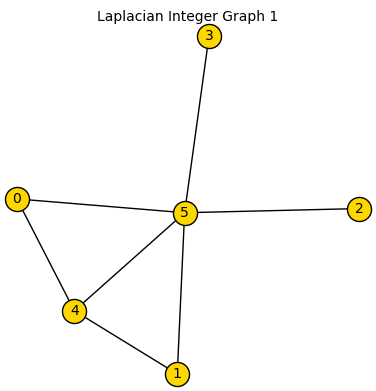

Graph 2:
Edges: [(0, 3), (0, 5), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5)]


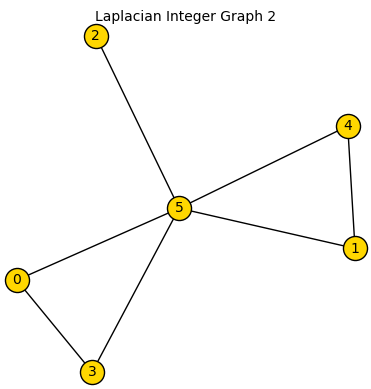

Graph 3:
Edges: [(0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 4), (2, 5)]


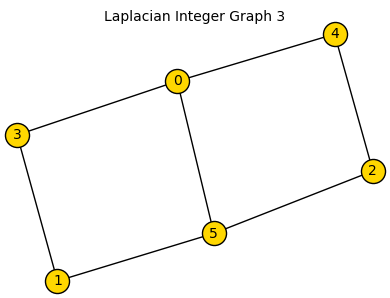

In [12]:
bicyclic_laplacian_integer_graphs(6)

Total graphs with two cycles: 1
Total Laplacian integer graphs found: 1
Graph 1:
Edges: [(0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


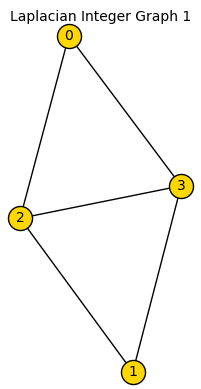

Total graphs with two cycles: 5
Total Laplacian integer graphs found: 3
Graph 1:
Edges: [(0, 3), (0, 4), (1, 3), (1, 4), (2, 4), (3, 4)]


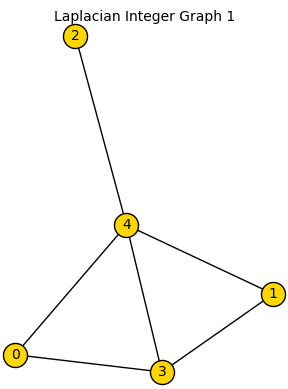

Graph 2:
Edges: [(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4)]


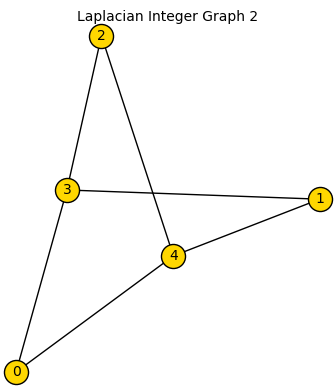

Graph 3:
Edges: [(0, 2), (0, 4), (1, 3), (1, 4), (2, 4), (3, 4)]


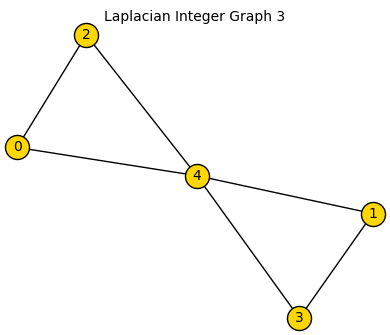

Total graphs with two cycles: 67
Total Laplacian integer graphs found: 2
Graph 1:
Edges: [(0, 5), (0, 6), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6)]


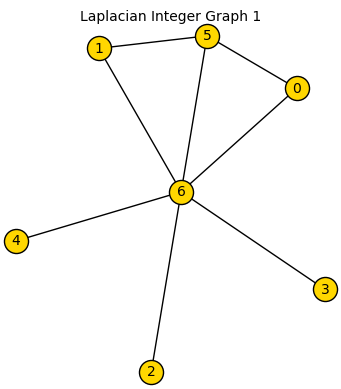

Graph 2:
Edges: [(0, 4), (0, 6), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6)]


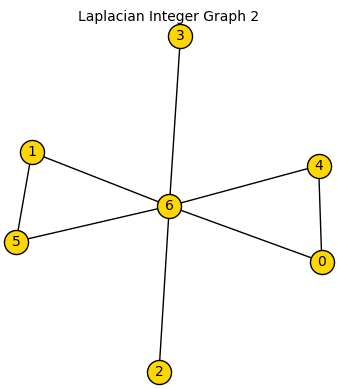

In [14]:
bicyclic_laplacian_integer_graphs(7)

Total graphs with two cycles: 236
Total Laplacian integer graphs found: 2
Graph 1:
Edges: [(0, 6), (0, 7), (1, 6), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]


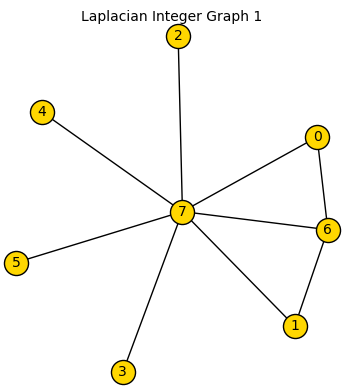

Graph 2:
Edges: [(0, 5), (0, 7), (1, 6), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]


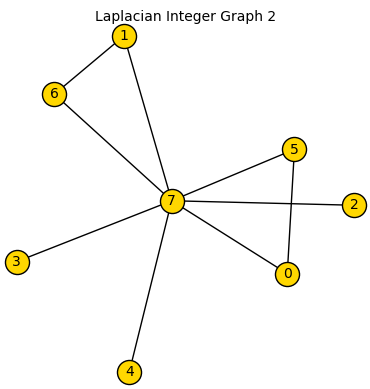

In [15]:
bicyclic_laplacian_integer_graphs(8)

Total graphs with two cycles: 797
Total Laplacian integer graphs found: 2
Graph 1:
Edges: [(0, 7), (0, 8), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]


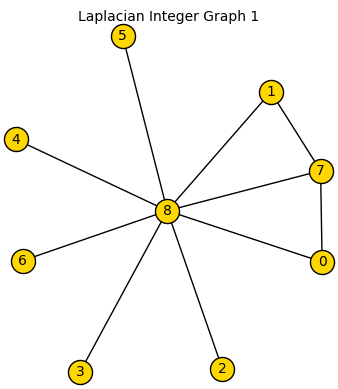

Graph 2:
Edges: [(0, 6), (0, 8), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]


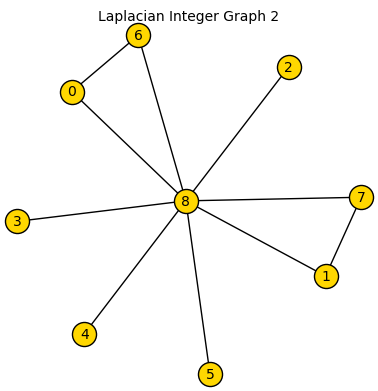

In [16]:
bicyclic_laplacian_integer_graphs(9)